## **Yellow Fever Disease Outbreak in Africa**

### **1. Data Preparation and Merging**

In [ ]:
import os
import pandas as pd
from google.colab import files

In [ ]:
yf_df = pd.read_csv(r'/content/yellow_fever_All_years.csv', low_memory = False)
yf_df.shape

(18178, 97)

In [ ]:
west_ri = pd.read_csv(r'/content/west_ri (1).csv', low_memory = False)
west_ri.columns

Index(['Month', 'Year', 'DateOfOnSet', 'District_Name', 'Province_Name',
       'DateFirstEntered', 'DateLastUpdate', 'DateReceivedProv',
       'DateReceivedatNat', 'TotalNumHF',
       ...
       'Rota3', 'Country', 'Measles2_L1', 'MenA', 'HPV1', 'HPV2', 'Palu S1',
       'Palu S2', 'Palu S3', 'Palu S4'],
      dtype='object', length=158)

In [ ]:
west_ri.head()

,Month,Year,DateOfOnSet,District_Name,Province_Name,DateFirstEntered,DateLastUpdate,DateReceivedProv,DateReceivedatNat,TotalNumHF,...,Rota3,Country,Measles2_L1,MenA,HPV1,HPV2,Palu S1,Palu S2,Palu S3,Palu S4
0,1,2024,NaN,ds toma,Boucle du Mouhoun,NaN,NaN,NaN,NaN,36.0,...,778.0,BFA,694.0,NaN,1730.0,0.0,0.0,0.0,0.0,0.0
1,1,2024,NaN,ds tougan,Boucle du Mouhoun,NaN,NaN,NaN,NaN,48.0,...,929.0,BFA,898.0,NaN,374.0,0.0,0.0,0.0,0.0,0.0
2,1,2024,NaN,ds tougouri,Centre Nord,NaN,NaN,NaN,NaN,27.0,...,272.0,BFA,434.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2024,NaN,ds yako,Nord,NaN,NaN,NaN,NaN,69.0,...,2055.0,BFA,1864.0,NaN,55.0,0.0,0.0,0.0,0.0,0.0
4,1,2024,NaN,ds zabré,Centre Est,NaN,NaN,NaN,NaN,18.0,...,769.0,BFA,800.0,NaN,11.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
west_vaccine_data = [
    'BCG_L1', 'BCG_GE1', 'BCG_Opened', 'SevAEFI_BCG', 'OPVBirth',
    'OPV1_L1', 'OPV_Opened', 'OPV1_GE1', 'SevAEFI_OPV', 'OPV2_L1',
    'OPV2_GE1', 'OPV3_L1', 'OPV3_GE1', 'D1_L1', 'D1_GE1', 'DPT_Opened',
    'D2_L1', 'D2_GE1', 'D3_L1', 'D3_GE1', 'MHepB_L1', 'MHepB_GE1',
    'MHepB_Opened', 'SevAEFI_mHepB', 'Measles_Opened', 'SevAEFI_Measles',
    'Measles_L1', 'Measles_GE1', 'YF_L1', 'YF_GE1', 'YF_Opened',
    'SevAEFI_YF', 'COMP_L1', 'VitaminA1Year', 'VA1YearAndAbove', 'TT1_PW',
    'TT2_PW', 'TT3_PW', 'TT_Opened', 'SevAEFI_TT', 'TT4_PW', 'TT5_PW',
    'LactatingMothers', 'COMP_GE1', 'DT1_GE1', 'Hib1_L1', 'Hib2_L1',
    'Hib3_L1', 'Hib1_GE1', 'Hib2_GE1', 'Hib3_GE1', 'IPV1_L1', 'IPV2_L1',
    'IPV3_L1', 'IPV1_GE1', 'IPV2_GE1', 'IPV3_GE1', 'DT1_L1',
    'DPTHepB3_GE1', 'Meningo_A', 'DPTHepB1_GE1', 'DPTHibHepB1_GE1',
    'DPTHepB2_L1', 'DPTHepB1_L1', 'Rotavirus', 'DT2_L1',
    'Meningo_AC_W135_Y', 'DT3_L1', 'Meningo_A_C', 'Pneumo', 'MMR',
    'DT3_GE1', 'DT2_GE1', 'HepB1_GE1', 'Pentavalent_Meningitis',
    'DPTIPV2_GE1', 'HepB3_GE1', 'DPTHepBIPV2_GE1', 'DPTHepBIPV1_GE1',
    'DPTHepBIPV3_L1', 'DPTHepBIPV2_L1', 'DPTHibIPV1_L1', 'DPTIPV3_GE1',
    'DPTHibIPV2_L1', 'DPTIPV1_GE1', 'DPTIPV3_L1', 'DPTIPV2_L1',
    'DPTIPV1_L1', 'DPTHibHepB3_GE1', 'DPTHibHepB2_GE', 'DPTHepBIPV1_L1',
    'DPTHepBHibIPV3_L1', 'DPTHepB2_GE1', 'HepB3_L1', 'HepB2_L1',
    'HepB1_L1', 'DPTHepBHibIPV3_GE1', 'DPTHepBIPV3_GE1',
    'DPTHepBHibIPV1_GE1', 'HepB2_GE1', 'DPTHepBHibIPV2_L1',
    'DPTHepBHibIPV1_L1', 'DPTHibIPV3_GE1', 'DPTHibIPV2_GE1',
    'DPTHibIPV1_GE1', 'DPTHibIPV3_L1', 'DPTHepBHibIPV2_GE1', 'DPTHib2_L1',
    'DPTHibHepB3_L1', 'DPTHibHepB1_L1', 'DPTHepB3_L1', 'DPTHib3_GE1',
    'DPTHib3_L1', 'DPTHib1_GE1', 'DPTHib1_L1', 'DPTHib2_GE1',
    'DPTHibHepB2_L1', 'ReportId', 'Province_Code', 'District_Code',
    'Dpthibhepb2_GE1', 'DateSentFromProvToNat', 'SevAEFI_VA', 'VA_Opened',
    'SevAEFI_DPT', 'TT1_CBA', 'TT5_CBA', 'Tt2Cba', 'TT3_CBA', 'TT4_CBA',
    'TT2_CBA', 'Pneumo1', 'Pneumo2', 'Pneumo3', 'Rota1', 'Rota2', 'Rota3',
     'Measles2_L1', 'MenA', 'HPV1', 'HPV2', 'Palu S1', 'Palu S2',
    'Palu S3', 'Palu S4'
]


**Cleaning the West_ri dataset and Normalisation**

In [ ]:
west_ri['Country'].unique()

array(['BFA', 'NIE', 'LIB', 'CIV', 'BEN', 'GHA', 'GUI', 'MAI', 'NIG',
       'SEN', 'MAU', 'TOG', 'GAM', 'SIL', 'GUB', 'CAV'], dtype=object)

In [ ]:
west_countries = west_ri['Country'].unique()

In [ ]:
west_ri = west_ri.rename(columns={'District_Name': 'district_name'})

In [ ]:
west_ri['district_name'].nunique()

1737

In [ ]:
import re
import unicodedata
def normalise_district(df): # Create function to normalise all district names in datasets
    df['district_name'] = df['district_name'].apply(lambda x: re.sub(r'[^\w\s]', '',
                          unicodedata.normalize('NFKD', str(x))).replace('/', ' ').replace('-', ' ').strip().lower())
    return df


In [ ]:
west_ri = normalise_district(west_ri)

In [ ]:
# NUmber of district names after normalisation
west_ri['district_name'].nunique()

1733

Normalise the Yellow fever ditrict names

In [ ]:
yf_df = yf_df.rename (columns={'ReportingDistrict': 'district_name'})

In [ ]:
yf_df['district_name'].nunique()

2118

In [ ]:
yf_df = normalise_district(yf_df)

In [ ]:
yf_df['district_name'].nunique()

1944

In [ ]:
yf_df['CountryCode'] = yf_df['CountryCode'].str.upper()
yf_df['CountryCode'].unique()

array(['CNG', 'CAF', 'CAE', 'NIE', 'BEN', 'BFA', 'LIB', 'MAI', 'NIG',
       'SEN', 'TOG', 'SIL', 'GUI', 'CIV', 'CHA', 'GHA', 'GAB', 'EQG',
       'RDC', 'ANG'], dtype=object)

In [ ]:
west_ri= west_ri.rename(columns={'Country': 'country_name'})
yf_df = yf_df.rename(columns={'CountryCode': 'country_name'})

In [ ]:
west_YF = yf_df[yf_df['country_name'].isin(west_countries)]
west_YF

,DataType,Diseasecondition,country_name,ReportingHealthfacility,district_name,IdNumber,DateRecformdistrict,DateReceivedNational,NamesOfPatient,DateOfBirth,...,cchfnationallabresult,qualitycontrolsample,cchfregionallabresult,dateepirecreglabres,finalclassification,yronset,age,yfnationallabresult,uniquekey,recstatus
97,Case-based,NaN,NIE,PHC PANDOKI,quaan pan,NIE-PLS-QAP-21-001,NaN,NaN,JESICA PIUS,2000-05-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Case-based,NaN,NIE,PHCC LAMINGA,nasarawa,NIE-NAS-NSW-21-012,NaN,NaN,MUTAKA MOHAMMED RAJAB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Case-based,NaN,NIE,PHC,gwer west,NIE-BNS-NAK-21-015,NaN,NaN,IFESINACHI OGBONNI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Case-based,NaN,NIE,PHC,gwer west,NIE-BNS-NAK-21-016,NaN,NaN,ABABA SONTER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Case-based,NaN,NIE,PHC,gwer west,NIE-BNS-NAK-21-017,NaN,NaN,KASHIMANA IORSHASHI,2019-05-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,Case-Based,NaN,NIE,PHCC Anguwan Laka,numan,NIE-ADS-NUM-21-003,NaN,NaN,Fatima Sa'adu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52808,Case-Based,NaN,NIE,PHCC Samunaka,yola south,NIE-ADS-YLA-21-002,NaN,NaN,Khadija Umar,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52809,Case-Based,NaN,NIE,PHCC Kilbaji Wauru Jabbe,yola south,NIE-ADS-YLA-21-003,NaN,NaN,George Clament,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52810,Case-Based,NaN,NIE,PHCC Wuro Jabbe Inside Primary /Secondary School,yola south,NIE-ADS-YLA-21-004,NaN,NaN,Ahmed Adamu,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
west_countries

array(['BFA', 'NIE', 'LIB', 'CIV', 'BEN', 'GHA', 'GUI', 'MAI', 'NIG',
       'SEN', 'MAU', 'TOG', 'GAM', 'SIL', 'GUB', 'CAV'], dtype=object)

In [ ]:
common_countries = set(west_ri['country_name'].unique()).intersection(set(yf_df['country_name'].unique()))
print(common_countries)

{'MAI', 'NIG', 'SEN', 'GHA', 'BEN', 'TOG', 'CIV', 'NIE', 'LIB', 'BFA', 'SIL', 'GUI'}


In [ ]:
# Normalise Outcome data
def replace_outcome(df):
  df['Outcome'] = df['Outcome'].replace(['1', 'V','1-Vivant', '1-vivant','1-Alive', '1.0', 1.0,'ALIVE','1-VIVANT','VIVANT'], '1')
  df['Outcome'] = df['Outcome'].replace(['2','D', '2-Décédé', 'DIED',2.0,'2.0'], '2')
  df['Outcome'] = df['Outcome'].replace(['9','nan', '99.0',99,9,'99.0','99','9.0','3.0', 3.0,'33','3'], '9')
  df['Outcome'] = df['Outcome'].fillna('9')
  return df


In [ ]:
yf_df = replace_outcome(yf_df)
yf_df['Outcome'].unique()

array(['9', '1', '2'], dtype=object)

In [ ]:
west_YF = replace_outcome(west_YF)
west_YF['Outcome'].unique()

In [ ]:
# country in yellow fever all has outcome column
country_outcome = west_YF.groupby('country_name')['Outcome'].unique().apply(list).reset_index()
country_outcome

,country_name,Outcome
0,BEN,"[1, 9, 2]"
1,BFA,"[9, 1, 2]"
2,CIV,"[1, 2, 9]"
3,GHA,"[1, 9, 2]"
4,GUI,"[1, 2, 9]"
5,LIB,"[1, 9]"
6,MAI,"[1, 2]"
7,NIE,"[1, 2, 9]"
8,NIG,"[1, 9, 2]"
9,SEN,"[1, 2, 9]"


In [ ]:
west_merged_df = pd.merge(west_ri, yf_df, on=['district_name', 'country_name'], how='inner')

In [ ]:
west_merged_df

,Month,Year,DateOfOnSet,district_name,Province_Name,DateFirstEntered,DateLastUpdate,DateReceivedProv,DateReceivedatNat,TotalNumHF,...,cchfnationallabresult,qualitycontrolsample,cchfregionallabresult,dateepirecreglabres,finalclassification,yronset,age,yfnationallabresult,uniquekey,recstatus
0,1,2024,NaN,dunukofia,Anambra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,NaN,dunukofia,Anambra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,NaN,dunukofia,Anambra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,NaN,dunukofia,Anambra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,NaN,dunukofia,Anambra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242266,11,2023,NaN,tone,Savanes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242267,11,2023,NaN,tone,Savanes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242268,11,2023,NaN,tone,Savanes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242269,11,2023,NaN,tone,Savanes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Merging the dataset West Routine Immunisation vaccines with Yellow Fever by country on district**

In [ ]:
# Merging the datasets to check the district and countries that received vaccination
def merge_datasets( df, dataset_name):
  for country_name in df['country_name'].unique():
    merged_df = west_ri.merge(
        df[df['country_name'] == country_name],
        on=['district_name'],
        how='inner')  # Filter by country_name and perform inner join on district_name

    file_name = f"{country_name}_{dataset_name}.csv"
    merged_df.to_csv(file_name, index=False)  # Use the country name for the filename
    #files.download(file_name)
    print(f"{country_name}_{dataset_name}")
    print(merged_df.head())


In [ ]:
merge_datasets(west_YF, "west_RI_YF")

NIE_west_RI_YF
   Month  Year  DateOfOnSet district_name Province_Name DateFirstEntered  \
0      1  2024          NaN     dunukofia       Anambra              NaN   
1      1  2024          NaN     dunukofia       Anambra              NaN   
2      1  2024          NaN     dunukofia       Anambra              NaN   
3      1  2024          NaN     dunukofia       Anambra              NaN   
4      1  2024          NaN     dunukofia       Anambra              NaN   

  DateLastUpdate  DateReceivedProv DateReceivedatNat  TotalNumHF  ...  \
0            NaN               NaN               NaN         NaN  ...   
1            NaN               NaN               NaN         NaN  ...   
2            NaN               NaN               NaN         NaN  ...   
3            NaN               NaN               NaN         NaN  ...   
4            NaN               NaN               NaN         NaN  ...   

   cchfnationallabresult  qualitycontrolsample  cchfregionallabresult  \
0               

In [ ]:
BEN_west_RI_YF = pd.read_csv(r'/content/BEN_west_RI_YF.csv', low_memory = False)
BEN_west_RI_YF

,Month,Year,district_name,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,...,country_name_y,ReportingHealthfacility,IdNumber,DateSeenHealthFacility,DateHealthfacilitynotified,DateOfonset,Outcome,ProvinceOfResidence,DateReceivedNatlevel,RecStatus
0,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,KOKIBOROU,BEN-ALI-BAN-21-036,2021-03-04,2021-03-04 00:00:00,2021-02-25,1,ALIBORI,2021-03-06 00:00:00,0.0
1,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,KOKIBOROU,BEN-ALI-BAN-21 152,2021-07-25,2021-07-27 00:00:00,2021-07-18,1,ALIBORI,2021-07-27 00:00:00,0.0
2,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GOMPAROU,BEN-ALI-BAN-21-196,2021-10-25,2021-10-25 00:00:00,2021-10-24,1,ALIBORI,2021-10-28 00:00:00,0.0
3,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GNAMBANOU,BEN-ALI-BAN-22-013,2022-03-01,2022-03-01 00:00:00,2022-03-01,1,ALIBORI,2022-03-03 00:00:00,0.0
4,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GNAMBANOU,BEN-ALI-BAN-22-013,2022-03-01,2022-03-01 00:00:00,2022-03-01,1,ALIBORI,2022-03-03 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,ATHIEME,BEN-MON-LOK-21-201,2021-11-09,2021-11-09 00:00:00,2021-10-26,1,MONO,2021-11-13 00:00:00,0.0
9176,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,ATCHANNOU,BEN-MON-ATH-20-161,2020-12-11,2020-12-11 00:00:00,2020-12-09,1,MONO,2020-12-14 00:00:00,0.0
9177,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,CS ATHIEME,BEN-MON-ATH-23-171,2023-06-01,2023-06-01 00:00:00,2023-05-29,1,MONO,2023-06-02 00:00:00,0.0
9178,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,CS KPINNOU,BEN-MON-ATH-23-218,2023-07-17,2023-07-17 00:00:00,2023-07-14,1,MONO,2023-07-21 00:00:00,0.0


**Clean and preprocess the data (standardize formats).**

In [ ]:
# drop columns with null values in all rows in every country dataset using  Exception Handling
def remove_null_columns(file_name):
  try:
    df = pd.read_csv(file_name)
    df = df.dropna(axis=1, how='any')  # Drop columns with any null values
    df.to_csv(file_name, index=False) # Saves the modified DataFrame back to the original CSV
  except FileNotFoundError:
    print(f"File '{file_name}' not found.")

# Iterate through the merged CSV files and remove columns with null values
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    remove_null_columns(filename)


<ipython-input-32-cd7337c3484e>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
<ipython-input-32-cd7337c3484e>:4: DtypeWarning: Columns (182) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
<ipython-input-32-cd7337c3484e>:4: DtypeWarning: Columns (184,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


{'NIG', 'LIB', 'SIL', 'TOG', 'BFA', 'GHA', 'MAI', 'BEN', 'CIV', 'GUI', 'SEN', 'NIE'}

In [ ]:
# Iterate through the merged CSV files and check for the 'Outcome' column
for filename in os.listdir():
  if filename.endswith("west_RI_YF.csv"):
    try:
      df = pd.read_csv(filename)
      if 'Outcome' in df.columns:
        print(f"File '{filename}' has the 'Outcome' column.")
    except Exception as e:
      print(f"Error processing file '{filename}': {e}")


File 'GUI_west_RI_YF.csv' has the 'Outcome' column.
File 'TOG_west_RI_YF.csv' has the 'Outcome' column.
File 'CIV_west_RI_YF.csv' has the 'Outcome' column.
File 'NIE_west_RI_YF.csv' has the 'Outcome' column.
File 'LIB_west_RI_YF.csv' has the 'Outcome' column.
File 'SEN_west_RI_YF.csv' has the 'Outcome' column.
File 'BFA_west_RI_YF.csv' has the 'Outcome' column.
File 'GHA_west_RI_YF.csv' has the 'Outcome' column.
File 'BEN_west_RI_YF.csv' has the 'Outcome' column.
File 'SIL_west_RI_YF.csv' has the 'Outcome' column.
File 'NIG_west_RI_YF.csv' has the 'Outcome' column.
File 'MAI_west_RI_YF.csv' has the 'Outcome' column.


We shall consider GHA, BEN, NIE as case studies (Countries that received vaccination and has Outcome column)

In [ ]:
def drop_columns_with_100_percent_nulls(filename):
  try:
    df = pd.read_csv(filename)
    df = df.dropna(axis=1, how='all')
    df.to_csv(filename, index=False)
  except FileNotFoundError:
    print(f"File '{filename}' not found.")


In [ ]:
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    drop_columns_with_100_percent_nulls(filename)


In [ ]:
BEN_west_RI_YF = pd.read_csv(r'/content/BEN_west_RI_YF.csv', low_memory = False)
BEN_west_RI_YF

,Month,Year,district_name,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,...,country_name_y,ReportingHealthfacility,IdNumber,DateSeenHealthFacility,DateHealthfacilitynotified,DateOfonset,Outcome,ProvinceOfResidence,DateReceivedNatlevel,RecStatus
0,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,KOKIBOROU,BEN-ALI-BAN-21-036,2021-03-04,2021-03-04 00:00:00,2021-02-25,1,ALIBORI,2021-03-06 00:00:00,0.0
1,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,KOKIBOROU,BEN-ALI-BAN-21 152,2021-07-25,2021-07-27 00:00:00,2021-07-18,1,ALIBORI,2021-07-27 00:00:00,0.0
2,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GOMPAROU,BEN-ALI-BAN-21-196,2021-10-25,2021-10-25 00:00:00,2021-10-24,1,ALIBORI,2021-10-28 00:00:00,0.0
3,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GNAMBANOU,BEN-ALI-BAN-22-013,2022-03-01,2022-03-01 00:00:00,2022-03-01,1,ALIBORI,2022-03-03 00:00:00,0.0
4,1,2024,banikoara,1349.0,1332.0,1268.0,1295.0,1272.0,1200.0,1200.0,...,BEN,GNAMBANOU,BEN-ALI-BAN-22-013,2022-03-01,2022-03-01 00:00:00,2022-03-01,1,ALIBORI,2022-03-03 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,ATHIEME,BEN-MON-LOK-21-201,2021-11-09,2021-11-09 00:00:00,2021-10-26,1,MONO,2021-11-13 00:00:00,0.0
9176,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,ATCHANNOU,BEN-MON-ATH-20-161,2020-12-11,2020-12-11 00:00:00,2020-12-09,1,MONO,2020-12-14 00:00:00,0.0
9177,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,CS ATHIEME,BEN-MON-ATH-23-171,2023-06-01,2023-06-01 00:00:00,2023-05-29,1,MONO,2023-06-02 00:00:00,0.0
9178,8,2023,athieme,147.0,149.0,212.0,214.0,213.0,163.0,163.0,...,BEN,CS KPINNOU,BEN-MON-ATH-23-218,2023-07-17,2023-07-17 00:00:00,2023-07-14,1,MONO,2023-07-21 00:00:00,0.0


In [ ]:
import os
import pandas as pd

def remove_specific_columns(file_name):
  try:
    # Check if the file is empty before trying to read it
    if os.stat(file_name).st_size == 0:
      print(f"File '{file_name}' is empty, skipping.")
      return  # Skip processing if the file is empty

    df = pd.read_csv(file_name)
    columns_to_remove = ['District_Name','DistrictOfResidence', 'DistrictofResidence','Country','ReportingDistrict','Country_Code',
                         'CountryCode','country_name_y', '' ]
    columns_to_remove = [col for col in columns_to_remove if col in df.columns]  # Ensure columns exist in the DataFrame
    if columns_to_remove:
      df = df.drop(columns=columns_to_remove)
      df.to_csv(file_name, index=False)
  except FileNotFoundError:
    print(f"File '{file_name}' not found.")
  except pd.errors.EmptyDataError:
    print(f"File '{file_name}' is empty or has no headers, skipping.")


def rename_country_column(file_name):
  try:
    # Check if the file is empty before trying to read it
    if os.stat(file_name).st_size == 0:
      print(f"File '{file_name}' is empty, skipping.")
      return  # Skip processing if the file is empty

    df = pd.read_csv(file_name)
    if 'country_name_x' in df.columns:
      df = df.rename(columns={'country_name_x': 'country_name'})
      df.to_csv(file_name, index=False)
  except FileNotFoundError:
    print(f"File '{file_name}' not found.")
  except pd.errors.EmptyDataError:
    print(f"File '{file_name}' is empty or has no headers, skipping.")

In [ ]:
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    remove_specific_columns(filename)

File 'BFA_west_RI_YF.csv' is empty or has no headers, skipping.


In [ ]:
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
   rename_country_column(filename)

File 'BFA_west_RI_YF.csv' is empty or has no headers, skipping.


In [ ]:
NIE_west_RI_YF = pd.read_csv(r'/content/NIE_RI_YF_vac_per_district.csv', low_memory = False)
NIE_west_RI_YF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_name    1316 non-null   object 
 1   Year             1316 non-null   int64  
 2   BCG_L1           1316 non-null   float64
 3   OPVBirth         1316 non-null   float64
 4   OPV1_L1          1316 non-null   float64
 5   OPV2_L1          1316 non-null   float64
 6   OPV3_L1          1316 non-null   float64
 7   Measles_L1       1316 non-null   float64
 8   YF_L1            1316 non-null   float64
 9   TT1_PW           1316 non-null   float64
 10  DPTHibHepB3_L1   1316 non-null   float64
 11  DPTHibHepB1_L1   1316 non-null   float64
 12  DPTHibHepB2_L1   1316 non-null   float64
 13  Pneumo1          1316 non-null   float64
 14  Pneumo2          1316 non-null   float64
 15  Pneumo3          1316 non-null   float64
 16  Survivors        1316 non-null   int64  
 17  Deaths        

In [ ]:
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import os

# for filename in os.listdir():
#   if filename.endswith("_west_vaccines.csv"):
#     # Use os.remove to delete the file
#     os.remove(filename)
#     # Alternatively, use a shell command
#     # !rm {filename}

In [ ]:
data_dict = {}

for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    country_name = filename.split("_")[0]
    try:
        if os.stat(filename).st_size == 0:
            print(f"Skipping file {filename} because it is empty.")
            continue
        df = pd.read_csv(filename, on_bad_lines='skip')
    except pd.errors.ParserError:
        print(f"Skipping file {filename} due to parsing error.")
        continue
    except pd.errors.EmptyDataError:
        print(f"Skipping file {filename} because it has no data or columns.")
        continue

    data_dict[country_name] = df
data_dict.keys()

dict_keys([])

In [ ]:
import pandas as pd
import os

def calculate_vaccine_totals_by_district(df, categories):
    """Calculates the total vaccines administered per district per year for each vaccine category."""

    # Ensure categories are valid columns in the DataFrame
    valid_west_vaccine_data = [cat for cat in west_vaccine_data if cat in df.columns]

    # Convert relevant columns to numeric, errors='coerce' replaces non-numeric values with NaN
    for category in valid_west_vaccine_data:
        df[category] = pd.to_numeric(df[category], errors='coerce')

    # Grouping by district and year and summing the vaccines for each category
    vaccine_totals_yf = df.groupby(['district_name', 'Year'])[valid_west_vaccine_data].sum().reset_index()

    return vaccine_totals_yf

for country_name, df in data_dict.items():
    # Calculate total vaccines by district and year for each category
    vaccine_totals_yf = calculate_vaccine_totals_by_district(df, west_vaccine_data)

    # Output filename
    output_filename2 = f"{country_name}_RI_YF_west_vaccines.csv"

    # Save to CSV
    vaccine_totals_yf.to_csv(output_filename2, index=False)

    # Print the file saving confirmation
    print(f"Saved vaccine totals for {country_name} to {output_filename2}")

In [ ]:
NIE_RI_YF = pd.read_csv(r'/content/NIE_west_RI_YF.csv', low_memory = False)
NIE_RI_YF

In [ ]:
NIE_RI_YF_west_vaccines = pd.read_csv(r'/content/NIE_RI_YF_west_vaccines.csv', low_memory = False)
NIE_RI_YF_west_vaccines

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3
0,aba north,2023,10088.0,8661.0,5420.0,3937.0,5248.0,6368.0,6471.0,0.0,5414.0,5475.0,3925.0,5380.0,3840.0,5214.0
1,aba north,2024,4241.0,3837.0,2320.0,1658.0,2213.0,3388.0,2734.0,0.0,2322.0,2336.0,1653.0,2257.0,1564.0,624.0
2,aba south,2023,57416.0,54644.0,54896.0,44944.0,58896.0,44516.0,44208.0,0.0,59628.0,55832.0,45152.0,55312.0,45160.0,59256.0
3,aba south,2024,20684.0,19596.0,20880.0,16192.0,20260.0,17576.0,17416.0,0.0,20380.0,21212.0,16584.0,21056.0,16304.0,6168.0
4,abadam,2023,3993.0,1767.0,2697.0,2301.0,1827.0,2208.0,2844.0,0.0,1818.0,2697.0,2142.0,2697.0,2130.0,1818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,zing,2024,2192.0,2210.0,3253.0,3026.0,3063.0,2768.0,2762.0,0.0,3103.0,3277.0,3029.0,3262.0,3044.0,2502.0
1312,zurmi,2023,99085.0,78505.0,114289.0,96516.0,100352.0,92638.0,87367.0,0.0,102004.0,115458.0,97692.0,115339.0,97048.0,100366.0
1313,zurmi,2024,36582.0,31003.0,43022.0,38052.0,38906.0,32522.0,31731.0,0.0,39123.0,43015.0,38297.0,43085.0,38129.0,28826.0
1314,zuru,2023,142548.0,122514.0,128170.0,115094.0,125398.0,127834.0,129052.0,0.0,125902.0,128156.0,97622.0,126546.0,98126.0,125496.0


In [ ]:
NIE_RI_YF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87010 entries, 0 to 87009
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                87010 non-null  int64  
 1   Year                 87010 non-null  int64  
 2   district_name        87010 non-null  object 
 3   Province_Name        87010 non-null  object 
 4   BCG_L1               87010 non-null  float64
 5   OPVBirth             87010 non-null  float64
 6   OPV1_L1              87010 non-null  float64
 7   OPV2_L1              87010 non-null  float64
 8   OPV3_L1              87010 non-null  float64
 9   Measles_L1           87010 non-null  float64
 10  YF_L1                87010 non-null  float64
 11  TT1_PW               87010 non-null  float64
 12  DPTHibHepB3_L1       87010 non-null  float64
 13  DPTHibHepB1_L1       87010 non-null  float64
 14  DPTHibHepB2_L1       87010 non-null  float64
 15  Pneumo1              87010 non-null 

In [ ]:
NIE_RI_YF['Outcome'].unique()

array([1, 2, 9])

In [ ]:
BEN_west_RI_YF = pd.read_csv(r'/content/BEN_west_RI_YF.csv', low_memory = False)
BEN_west_RI_YF['Outcome'].unique()

array([1, 9, 2])

In [ ]:
GHA_west_RI_YF = pd.read_csv(r'/content/GHA_west_RI_YF.csv', low_memory = False)
GHA_west_RI_YF['Outcome'].unique()

array([1, 9, 2])

In [ ]:
# get outcome data
for filename in os.listdir():
  if filename.endswith("_RI_YF.csv"):
    try:
      df = pd.read_csv(filename)
      if 'Outcome' in df.columns and 'district_name' in df.columns and 'Year' in df.columns:
        country_name = filename.split("_")[0]
        grouped_df = df.groupby(['district_name', 'Year', 'Outcome'])['Outcome'].count().unstack(fill_value=0).reset_index()
        output_filename = f"{country_name}_RI_YF_outcomes_per_year.csv"
        grouped_df.to_csv(output_filename, index=False)
        print(f"Saved outcomes by district for {country_name} to {output_filename}")

    except Exception as e:
      print(f"Error processing {filename}: {e}")


Saved outcomes by district for GUI to GUI_RI_YF_outcomes_per_year.csv
Saved outcomes by district for TOG to TOG_RI_YF_outcomes_per_year.csv
Saved outcomes by district for CIV to CIV_RI_YF_outcomes_per_year.csv
Saved outcomes by district for NIE to NIE_RI_YF_outcomes_per_year.csv
Saved outcomes by district for LIB to LIB_RI_YF_outcomes_per_year.csv
Saved outcomes by district for SEN to SEN_RI_YF_outcomes_per_year.csv
Saved outcomes by district for GHA to GHA_RI_YF_outcomes_per_year.csv
Saved outcomes by district for BEN to BEN_RI_YF_outcomes_per_year.csv
Saved outcomes by district for SIL to SIL_RI_YF_outcomes_per_year.csv
Saved outcomes by district for NIG to NIG_RI_YF_outcomes_per_year.csv
Saved outcomes by district for MAI to MAI_RI_YF_outcomes_per_year.csv


In [ ]:
NIE_RI_YF_outcomes_per_year = pd.read_csv(r'/content/NIE_RI_YF_outcomes_per_year.csv', low_memory = False)
NIE_RI_YF_outcomes_per_year

,district_name,Year,1,2,9
0,aba north,2023,11,0,0
1,aba north,2024,5,0,0
2,aba south,2023,44,0,0
3,aba south,2024,20,0,0
4,abadam,2023,33,0,0
...,...,...,...,...,...
1311,zing,2024,5,0,0
1312,zurmi,2023,77,0,0
1313,zurmi,2024,35,0,0
1314,zuru,2023,154,0,0


Merge the vaccines df and outcomes per district

In [ ]:
for filename in os.listdir():
    if filename.endswith("_RI_YF_west_vaccines.csv"):
        country_name = filename.split("_")[0]
        vaccines_file = filename
        outcomes_file = f"{country_name}_RI_YF_outcomes_per_year.csv"

        if os.path.exists(outcomes_file):
            try:
                # Read the data
                vaccines_df = pd.read_csv(vaccines_file)
                outcomes_df = pd.read_csv(outcomes_file)

                merged_df = pd.merge(vaccines_df, outcomes_df, on=['district_name', 'Year'], how='inner')

                # Save the merged dataset
                merged_df.to_csv(f"{country_name}_RI_YF_vac_per_district.csv", index=False)
                print(f"Merged {vaccines_file} and {outcomes_file} into {country_name}_RI_YF_vac_per_district.csv")

            except Exception as e:
                print(f"Error merging files for {country_name}: {e}")
        else:
            print(f"Outcomes file not found for {country_name}: {outcomes_file}")



Merged BEN_RI_YF_west_vaccines.csv and BEN_RI_YF_outcomes_per_year.csv into BEN_RI_YF_vac_per_district.csv
Merged CIV_RI_YF_west_vaccines.csv and CIV_RI_YF_outcomes_per_year.csv into CIV_RI_YF_vac_per_district.csv
Merged GHA_RI_YF_west_vaccines.csv and GHA_RI_YF_outcomes_per_year.csv into GHA_RI_YF_vac_per_district.csv
Merged NIG_RI_YF_west_vaccines.csv and NIG_RI_YF_outcomes_per_year.csv into NIG_RI_YF_vac_per_district.csv
Merged TOG_RI_YF_west_vaccines.csv and TOG_RI_YF_outcomes_per_year.csv into TOG_RI_YF_vac_per_district.csv
Merged GUI_RI_YF_west_vaccines.csv and GUI_RI_YF_outcomes_per_year.csv into GUI_RI_YF_vac_per_district.csv
Merged SEN_RI_YF_west_vaccines.csv and SEN_RI_YF_outcomes_per_year.csv into SEN_RI_YF_vac_per_district.csv
Merged LIB_RI_YF_west_vaccines.csv and LIB_RI_YF_outcomes_per_year.csv into LIB_RI_YF_vac_per_district.csv
Merged SIL_RI_YF_west_vaccines.csv and SIL_RI_YF_outcomes_per_year.csv into SIL_RI_YF_vac_per_district.csv
Merged MAI_RI_YF_west_vaccines.csv an

In [ ]:
NIE_RI_YF_vac_per_district = pd.read_csv(r'/content/NIE_RI_YF_vac_per_district.csv', low_memory = False)
NIE_RI_YF_vac_per_district

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,1,2,9
0,aba north,2023,10088.0,8661.0,5420.0,3937.0,5248.0,6368.0,6471.0,0.0,5414.0,5475.0,3925.0,5380.0,3840.0,5214.0,11,0,0
1,aba north,2024,4241.0,3837.0,2320.0,1658.0,2213.0,3388.0,2734.0,0.0,2322.0,2336.0,1653.0,2257.0,1564.0,624.0,5,0,0
2,aba south,2023,57416.0,54644.0,54896.0,44944.0,58896.0,44516.0,44208.0,0.0,59628.0,55832.0,45152.0,55312.0,45160.0,59256.0,44,0,0
3,aba south,2024,20684.0,19596.0,20880.0,16192.0,20260.0,17576.0,17416.0,0.0,20380.0,21212.0,16584.0,21056.0,16304.0,6168.0,20,0,0
4,abadam,2023,3993.0,1767.0,2697.0,2301.0,1827.0,2208.0,2844.0,0.0,1818.0,2697.0,2142.0,2697.0,2130.0,1818.0,33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,zing,2024,2192.0,2210.0,3253.0,3026.0,3063.0,2768.0,2762.0,0.0,3103.0,3277.0,3029.0,3262.0,3044.0,2502.0,5,0,0
1312,zurmi,2023,99085.0,78505.0,114289.0,96516.0,100352.0,92638.0,87367.0,0.0,102004.0,115458.0,97692.0,115339.0,97048.0,100366.0,77,0,0
1313,zurmi,2024,36582.0,31003.0,43022.0,38052.0,38906.0,32522.0,31731.0,0.0,39123.0,43015.0,38297.0,43085.0,38129.0,28826.0,35,0,0
1314,zuru,2023,142548.0,122514.0,128170.0,115094.0,125398.0,127834.0,129052.0,0.0,125902.0,128156.0,97622.0,126546.0,98126.0,125496.0,154,0,0


In [ ]:
# Rename the outcome columns
for filename in os.listdir():
  if filename.endswith("_RI_YF_vac_per_district.csv"):
    try:
      df = pd.read_csv(filename)
      new_columns = []
      for column in df.columns:
        if column == '1':
          new_columns.append('Survivors')
        elif column == '2':
          new_columns.append('Deaths')
        elif column == '9':
          new_columns.append('Outcome_Unknown')
        else:
          new_columns.append(column)
      df.columns = new_columns
      df.to_csv(filename, index=False)
      print(f"Renamed columns in {filename}")
    except Exception as e:
      print(f"Error processing {filename}: {e}")


Renamed columns in TOG_RI_YF_vac_per_district.csv
Renamed columns in SEN_RI_YF_vac_per_district.csv
Renamed columns in NIE_RI_YF_vac_per_district.csv
Renamed columns in NIG_RI_YF_vac_per_district.csv
Renamed columns in BEN_RI_YF_vac_per_district.csv
Renamed columns in LIB_RI_YF_vac_per_district.csv
Renamed columns in MAI_RI_YF_vac_per_district.csv
Renamed columns in GUI_RI_YF_vac_per_district.csv
Renamed columns in GHA_RI_YF_vac_per_district.csv
Renamed columns in SIL_RI_YF_vac_per_district.csv
Renamed columns in CIV_RI_YF_vac_per_district.csv


In [ ]:
NIE_RI_YF_vac_per_district = pd.read_csv(r'/content/NIE_RI_YF_vac_per_district.csv', low_memory = False)
NIE_RI_YF_vac_per_district

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude
0,aba north,2023,10088.0,8661.0,5420.0,3937.0,5248.0,6368.0,6471.0,0.0,...,5475.0,3925.0,5380.0,3840.0,5214.0,11,0,0,34.345247,35.827697
1,aba north,2024,4241.0,3837.0,2320.0,1658.0,2213.0,3388.0,2734.0,0.0,...,2336.0,1653.0,2257.0,1564.0,624.0,5,0,0,34.345247,35.827697
2,aba south,2023,57416.0,54644.0,54896.0,44944.0,58896.0,44516.0,44208.0,0.0,...,55832.0,45152.0,55312.0,45160.0,59256.0,44,0,0,37.850575,-122.252622
3,aba south,2024,20684.0,19596.0,20880.0,16192.0,20260.0,17576.0,17416.0,0.0,...,21212.0,16584.0,21056.0,16304.0,6168.0,20,0,0,37.850575,-122.252622
4,abadam,2023,3993.0,1767.0,2697.0,2301.0,1827.0,2208.0,2844.0,0.0,...,2697.0,2142.0,2697.0,2130.0,1818.0,33,0,0,36.645721,3.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,zing,2024,2192.0,2210.0,3253.0,3026.0,3063.0,2768.0,2762.0,0.0,...,3277.0,3029.0,3262.0,3044.0,2502.0,5,0,0,6.050000,14.516670
1312,zurmi,2023,99085.0,78505.0,114289.0,96516.0,100352.0,92638.0,87367.0,0.0,...,115458.0,97692.0,115339.0,97048.0,100366.0,77,0,0,NaN,NaN
1313,zurmi,2024,36582.0,31003.0,43022.0,38052.0,38906.0,32522.0,31731.0,0.0,...,43015.0,38297.0,43085.0,38129.0,28826.0,35,0,0,NaN,NaN
1314,zuru,2023,142548.0,122514.0,128170.0,115094.0,125398.0,127834.0,129052.0,0.0,...,128156.0,97622.0,126546.0,98126.0,125496.0,154,0,0,-19.900000,32.733330


In [ ]:
from geopy.geocoders import ArcGIS
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time
from tqdm import tqdm
from google.colab import files

**Add localisation of each country and their districts (Latitude and Longitude).**

In [ ]:
# Fetch coordinates for West countries
geolocator = ArcGIS()

def get_coordinates(district_name, country_name):
    location = f"{district_name}, {country_name}"
    retries = 3
    while retries > 0:
        try:
            time.sleep(5)  # Add a small delay between requests
            location_info = geolocator.geocode(location, timeout=10)
            if location_info:
                latitude = location_info.latitude
                longitude = location_info.longitude
                return latitude, longitude
            else:
                return None, None  # Or handle cases where no location is found
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            retries -= 1
            if retries > 0:
                print(f"Geocoding failed for {location}. Retrying ({retries} retries remaining)")
                time.sleep(5)  # Increase the delay on retry
            else:
                print(f"Geocoding failed for {location} after multiple attempts: {e}")
                return None, None


def geolocate_west_datasets(dataset_name):
  for filename in os.listdir():
    if filename.endswith("_RI_YF_vac_per_district.csv"):
      try:
        df = pd.read_csv(filename)
        unique_districts = df[['district_name']].drop_duplicates()

        coordinates = {}

        for _, row in tqdm(unique_districts.iterrows(), desc=f"Fetching coordinates for {filename}", total=len(unique_districts)):
          country_name = filename.split("_")[0]
          lat, lon = get_coordinates(row['district_name'], country_name)
          coordinates[row['district_name']] = (lat, lon)

        coord_df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
        coord_df.index.name = 'district_name'
        coord_df = coord_df.reset_index()

        merged_df_with_coords = df.merge(coord_df, on='district_name', how='left')
        merged_df_with_coords.to_csv(filename, index=False)
        print(f"Updated {filename} with coordinates")

      except Exception as e:
        print(f"Error processing {filename}: {e}")



In [ ]:
for filename in os.listdir():
  if filename.endswith("_RI_YF_vac_per_district.csv"):
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
NIG_RI_YF_vac_per_district = pd.read_csv(r'/content/NIG_RI_YF_vac_per_district.csv', low_memory = False)
NIG_RI_YF_vac_per_district

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Measles2_L1,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude
0,abalak,2023,43260.0,22557.0,40341.0,39000.0,39057.0,38649.0,38640.0,38703.0,...,39000.0,40341.0,39000.0,39048.0,35586.0,30,0,0,56.011400,97.350100
1,abalak,2024,23751.0,12150.0,21093.0,20010.0,20010.0,20625.0,20625.0,20970.0,...,20010.0,21093.0,20010.0,20010.0,18663.0,15,0,0,56.011400,97.350100
2,agadez,2023,29336.0,11268.0,24704.0,23272.0,23236.0,19092.0,19036.0,14332.0,...,23272.0,24720.0,23272.0,23228.0,8512.0,40,0,0,16.974268,7.989093
3,agadez,2024,17008.0,6580.0,12664.0,12420.0,13036.0,11472.0,11472.0,5848.0,...,12404.0,12716.0,12500.0,12772.0,6844.0,20,0,0,16.974268,7.989093
4,aguie,2023,141984.0,49437.0,120744.0,113058.0,111528.0,113598.0,110646.0,93627.0,...,112986.0,120609.0,112887.0,111708.0,55575.0,90,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,tanout,2024,74760.0,23485.0,73635.0,68515.0,67615.0,62805.0,62805.0,45025.0,...,68505.0,73635.0,68505.0,67615.0,49830.0,25,0,0,32.685650,-6.106480
68,tessaoua,2023,293700.0,106290.0,286290.0,271800.0,268280.0,257080.0,255260.0,158100.0,...,272400.0,285370.0,273400.0,268380.0,139040.0,100,0,0,13.756879,7.988089
69,tessaoua,2024,155190.0,56280.0,153220.0,143870.0,144530.0,125550.0,125640.0,81840.0,...,143970.0,153220.0,143860.0,144360.0,73150.0,50,0,0,13.756879,7.988089
70,tibiri,2023,138680.0,51072.0,120856.0,115736.0,115240.0,113032.0,113560.0,88528.0,...,115896.0,121128.0,115832.0,115224.0,68952.0,80,0,0,19.699440,-99.174009


In [ ]:

def create_geolocalisation_column(filename):
  try:
    df = pd.read_csv(filename)
    if 'Latitude' in df.columns and 'Longitude' in df.columns:
      df['geolocalisation'] = df.apply(lambda row: str(row['Latitude']) + ',' + str(row['Longitude']), axis=1)
      df.to_csv(filename, index=False)
      print(f"Created 'geolocalisation' column in {filename}")
    else:
      print(f"Latitude or Longitude column not found in {filename}")
  except FileNotFoundError:
    print(f"File '{filename}' not found.")
  except Exception as e:
    print(f"Error processing {filename}: {e}")


for filename in os.listdir():
  if filename.endswith("_RI_YF_vac_per_district.csv"):
    create_geolocalisation_column(filename)



Created 'geolocalisation' column in TOG_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in SEN_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in NIE_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in NIG_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in BEN_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in LIB_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in MAI_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in GUI_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in GHA_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in SIL_RI_YF_vac_per_district.csv
Created 'geolocalisation' column in CIV_RI_YF_vac_per_district.csv


In [ ]:
NIG_RI_YF_vac_per_district = pd.read_csv(r'/content/NIG_RI_YF_vac_per_district.csv', low_memory = False)
NIG_RI_YF_vac_per_district

In [ ]:
NIG_RI_YF_vac_per_district['Latitude'].to_list()


[56.0114,
 56.0114,
 16.9742679,
 16.9742679,
 nan,
 nan,
 18.7386903,
 18.7386903,
 nan,
 nan,
 nan,
 nan,
 23.7824,
 23.7824,
 55.5727193,
 55.5727193,
 nan,
 nan,
 41.8255399,
 41.8255399,
 45.552707,
 45.552707,
 11.1301,
 11.1301,
 49.1770195,
 49.1770195,
 -2.94022,
 -2.94022,
 46.2788,
 46.2788,
 nan,
 nan,
 28.353714,
 28.353714,
 34.85245,
 34.85245,
 13.7119689,
 13.7119689,
 nan,
 nan,
 31.22048,
 31.22048,
 47.9501,
 47.9501,
 33.96756891,
 33.96756891,
 52.48799,
 52.48799,
 55.3745224,
 55.3745224,
 18.61083,
 18.61083,
 13.30502,
 13.30502,
 14.9883,
 14.9883,
 42.46667,
 42.46667,
 42.97040289,
 42.97040289,
 56.8451703,
 56.8451703,
 9.9618826,
 9.9618826,
 14.894567,
 14.894567,
 32.68565,
 32.68565,
 13.756879,
 13.756879,
 19.6994395,
 19.6994395]

In [ ]:
NIG_RI_YF_vac_per_district['Longitude'].to_list()

[97.3501,
 97.3501,
 7.9890933,
 7.9890933,
 nan,
 nan,
 7.3932517,
 7.3932517,
 nan,
 nan,
 nan,
 nan,
 85.9506,
 85.9506,
 37.4736857,
 37.4736857,
 nan,
 nan,
 12.6111092,
 12.6111092,
 -73.758698,
 -73.758698,
 17.8837,
 17.8837,
 2.4584591,
 2.4584591,
 10.37554,
 10.37554,
 10.34191,
 10.34191,
 nan,
 nan,
 79.279645,
 79.279645,
 -5.51818,
 -5.51818,
 11.1877903,
 11.1877903,
 nan,
 nan,
 -9.64907,
 -9.64907,
 -73.23241,
 -73.23241,
 133.85036339,
 133.85036339,
 13.39049,
 13.39049,
 28.5668004,
 28.5668004,
 8.41972,
 8.41972,
 7.1618878,
 7.1618878,
 9.2684,
 9.2684,
 2.15,
 2.15,
 142.05934074,
 142.05934074,
 60.6430863,
 60.6430863,
 123.1298835,
 123.1298835,
 5.262698,
 5.262698,
 -6.10648,
 -6.10648,
 7.9880891,
 7.9880891,
 -99.1740086,
 -99.1740086]

Sort per year

In [ ]:
NIG_RI_YF_vac_per_district_2023 = NIG_RI_YF_vac_per_district[NIG_RI_YF_vac_per_district['Year'] == 2023]
NIG_RI_YF_vac_per_district_2024 = NIG_RI_YF_vac_per_district[NIG_RI_YF_vac_per_district['Year'] == 2024]


In [ ]:
# Save the DataFrame to a CSV file
NIG_RI_YF_vac_per_district_2023.to_csv('NIG_RI_YF_vac_per_district_2023.csv', index=False)
NIG_RI_YF_vac_per_district_2024.to_csv('NIG_RI_YF_vac_per_district_2024.csv', index=False)

In [ ]:
GHA_RI_YF_vac_per_district = pd.read_csv(r'/content/GHA_RI_YF_vac_per_district.csv', low_memory = False)

GHA_RI_YF_vac_per_district_2023 = GHA_RI_YF_vac_per_district[GHA_RI_YF_vac_per_district['Year'] == 2023]
GHA_RI_YF_vac_per_district_2024 = GHA_RI_YF_vac_per_district[GHA_RI_YF_vac_per_district['Year'] == 2024]

# Save the DataFrame to a CSV file
GHA_RI_YF_vac_per_district_2023.to_csv('GHA_RI_YF_vac_per_district_2023.csv', index=False)
GHA_RI_YF_vac_per_district_2024.to_csv('GHA_RI_YF_vac_per_district_2024.csv', index=False)

In [ ]:
TOG_RI_YF_vac_per_district = pd.read_csv(r'/content/TOG_RI_YF_vac_per_district.csv', low_memory = False)

TOG_RI_YF_vac_per_district_2023 = TOG_RI_YF_vac_per_district[TOG_RI_YF_vac_per_district['Year'] == 2023]
TOG_RI_YF_vac_per_district_2024 = TOG_RI_YF_vac_per_district[TOG_RI_YF_vac_per_district['Year'] == 2024]

TOG_RI_YF_vac_per_district_2023.to_csv('TOG_RI_YF_vac_per_district_2023.csv', index=False)
TOG_RI_YF_vac_per_district_2024.to_csv('TOG_RI_YF_vac_per_district_2024.csv', index=False)


**Map visualization of vaccines administered for each country and their outcome.**

**Map the vaccines per country**

In [ ]:

def calculate_vaccine_totals_per_year(df, categories):
    """Calculates the total vaccines administered per country per year for each vaccine category."""

    # Ensure categories are valid columns in the DataFrame
    valid_west_vaccine_data = [cat for cat in west_vaccine_data if cat in df.columns]

    # Convert relevant columns to numeric, errors='coerce' replaces non-numeric values with NaN
    for category in valid_west_vaccine_data:
        df[category] = pd.to_numeric(df[category], errors='coerce')

    # Grouping by district and year and summing the vaccines for each category
    vaccine_totals_year = df.groupby(['Year'])[valid_west_vaccine_data].sum().reset_index()

    return vaccine_totals_year

for country_name, df in data_dict.items():
    # Calculate total vaccines by district and year for each category
    vaccine_totals_year = calculate_vaccine_totals_per_year(df, west_vaccine_data)

    # Output filename
    output_filename3 = f"{country_name}_west_vaccines_yr.csv"

    # Save to CSV
    vaccine_totals_year.to_csv(output_filename3, index=False)

    # Print the file saving confirmation
    print(f"Saved vaccine totals for {country_name} to {output_filename3}")

In [ ]:
ghana_2023 = pd.read_csv(r'/content/ghana_Weather_2023.csv', low_memory = False)
vaccine_totals_ghana_2023 = calculate_vaccine_totals_per_year(ghana_2023, west_vaccine_data)
vaccine_totals_ghana_2023.to_csv('GHA_west_vaccines_yr_2023.csv', index=False)
vaccine_totals_ghana_2023

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,IPV1_L1,...,DPTHibHepB2_L1,Dpthibhepb2_GE1,Pneumo1,Pneumo2,Pneumo3,Rota1,Rota2,Rota3,Measles2_L1,MenA
0,2023,13523748.0,8309927.0,12824863.0,12536620.0,12960288.0,181551.0,12066042.0,3060501.0,13784677.0,...,12951921.0,13499.0,6911.0,12394329.0,12785791.0,9694425.0,9094140.0,8539298.0,11192164.0,11622818.0


In [ ]:
ghana_2024 = pd.read_csv(r'/content/ghana_Weather_2024.csv', low_memory = False)
vaccine_totals_ghana_2024 = calculate_vaccine_totals_per_year(ghana_2024, west_vaccine_data)
vaccine_totals_ghana_2024.to_csv('GHA_west_vaccines_yr_2024.csv', index=False)
vaccine_totals_ghana_2024

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,IPV1_L1,...,DPTHibHepB2_L1,Dpthibhepb2_GE1,Pneumo1,Pneumo2,Pneumo3,Rota1,Rota2,Rota3,Measles2_L1,MenA
0,2024,5703084.0,4096576.0,5580479.0,5535659.0,5847431.0,5710393.0,5108820.0,1273936.0,5741592.0,...,5284999.0,7847.0,5432310.0,5374345.0,5701505.0,5302893.0,5131827.0,4641452.0,5187834.0,4232554.0


In [ ]:
nig_2023 = pd.read_csv(r'/content/nigeria_Weather_2023.csv', low_memory = False)
vaccine_totals_nig_2023 = calculate_vaccine_totals_per_year(nig_2023, west_vaccine_data)
vaccine_totals_nig_2023.to_csv('NIG_west_vaccines_yr_2023.csv', index=False)
vaccine_totals_nig_2023

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,IPV1_L1,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Measles2_L1
0,2023,8419063.0,5532100.0,7693952.0,8225206.0,7377942.0,7767675.0,7488701.0,6027684.0,7405351.0,7388809.0,7696189.0,7399345.0,7690295.0,7398070.0,7385100.0,6247692.0


In [ ]:
nig_2024 = pd.read_csv(r'/content/nigeria_Weather_2024.csv', low_memory = False)
vaccine_totals_nig_2024 = calculate_vaccine_totals_per_year(nig_2024, west_vaccine_data)
vaccine_totals_nig_2024.to_csv('NIG_west_vaccines_yr_2024.csv', index=False)
vaccine_totals_nig_2024

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,IPV1_L1,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Measles2_L1
0,2024,4496368.0,2711919.0,4017455.0,3821944.0,3827723.0,3885091.0,3879775.0,3159747.0,3828025.0,3827571.0,4017837.0,3822861.0,4016861.0,3822606.0,3821759.0,3243370.0


In [ ]:
togo_2023 = pd.read_csv(r'/content/togo_Weather_2023.csv', low_memory = False)
vaccine_totals_togo_2023 = calculate_vaccine_totals_per_year(togo_2023, west_vaccine_data)
vaccine_totals_togo_2023.to_csv('TOG_west_vaccines_year_2023.csv', index=False)
vaccine_totals_togo_2023

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,IPV1_L1,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Rota1,Rota2,Measles2_L1,MenA
0,2023,3943378.0,3986330.0,4295382.0,4163752.0,4101563.0,3878656.0,3788587.0,4151451.0,4259307.0,4441717.0,4306975.0,4444103.0,4304064.0,4249602.0,4426575.0,4279632.0,3430525.0,3449611.0


In [ ]:
togo_2024 = pd.read_csv(r'/content/togo_Weather_2024.csv', low_memory = False)
vaccine_totals_togo_2024 = calculate_vaccine_totals_per_year(togo_2024, west_vaccine_data)
vaccine_totals_togo_2024.to_csv('TOG_west_vaccines_yr_2024.csv', index=False)
vaccine_totals_togo_2024

,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,IPV1_L1,DPTHibHepB3_L1,DPTHibHepB1_L1,DPTHibHepB2_L1,Pneumo1,Pneumo2,Pneumo3,Rota1,Rota2,Measles2_L1,MenA
0,2024,1152486.0,1324170.0,1491465.0,1481603.0,1478788.0,1447020.0,1454325.0,1462443.0,1490011.0,1502792.0,1495928.0,1503542.0,1495648.0,1489828.0,1502691.0,1495549.0,1158999.0,1167090.0


In [ ]:
import folium
import pandas as pd

# Coordinates for each country
country_coords = {
    'Nigeria': (9.0765, 7.3986),
    'Togo': (6.1319, 1.2220),
    'Ghana': (5.6037, -0.1870)
}

# Create a map centered around the region
m = folium.Map(location=[7.0, 0.0], zoom_start=5)

# Load your vaccine data (replace with your actual file paths)
nigeria_vaccine_data = pd.read_csv('/content/NIG_west_vaccines_yr_2023.csv')
togo_vaccine_data = pd.read_csv('/content/TOG_west_vaccines_year_2023.csv')
ghana_vaccine_data = pd.read_csv('/content/GHA_west_vaccines_yr_2023.csv')

# Function to create a popup string for vaccine totals
def create_popup(row):
  popup_text = ""
  for col in row.index:
      if col != "Year":
        popup_text += f"{col}: {row[col]}<br>"
  return popup_text

# Iterate through each country's data and add markers to the map
for country, coords in country_coords.items():
    if country == "Nigeria":
        df = nigeria_vaccine_data
    elif country == "Togo":
        df = togo_vaccine_data
    elif country == "Ghana":
        df = ghana_vaccine_data
    else:
        continue

    for index, row in df.iterrows():
        popup = create_popup(row)
        folium.Marker(
            location=coords,
            popup=popup,
            tooltip=f"{country} - {row['Year']}"
        ).add_to(m)

# Display the map
m

**Map the vaccines per district for GHANA**

In [ ]:
import pandas as pd
import folium

# Load the dataset
ghana = pd.read_csv(r'/content/GHA_RI_YF_vac_per_district.csv', low_memory = False)

# Drop rows with missing latitude, longitude, or district names
ghana = ghana.dropna(subset=['Latitude', 'Longitude', 'district_name'])

# Calculate the center of the map
center_lat, center_lon = ghana['Latitude'].mean(), ghana['Longitude'].mean()

# Create a folium map centered on the mean latitude and longitude
ghana_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Iterate through each district and add markers with vaccine data
for _, row in ghana.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    district = row['district_name']
    #country = row['country_name']

    # Assuming vaccines data columns start from column index 5 (adjust as needed)
    vaccine_data = row.iloc[2:27]

    # Create popup text with country, district, and vaccine counts
    popup_text = f"<b>Country: GHA </b><br><b>District:</b> {district}<br>"
    for vaccine, count in vaccine_data.items():
        if count != 0:
            popup_text += f"{vaccine}: {count}<br>"

    # Add a marker for the district
    folium.Marker(
        location=[lat, lon],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(ghana_map)

# Display the map
ghana_map


### **2. Environmental Data per country**

**Weather Data per country and district**

In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00


**2024**

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# URL for Open-Meteo historical weather API
url = "https://archive-api.open-meteo.com/v1/archive"

def fetch_weather_for_location(lat, lon):
    """
    Fetch temperature and humidity data for a given location (lat, lon) in 2024.
    """
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": "2024-01-01",
        "end_date": "2024-08-31",
        "hourly": ["temperature_2m", "relative_humidity_2m"],
        "temporal_resolution": "native",
        "timezone": "auto",
    }

    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]

        # Process hourly data
        hourly = response.Hourly()
        hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
        hourly_humidity_2m = hourly.Variables(1).ValuesAsNumpy()

        # Get the best (maximum) temperature for the location
        best_temperature = hourly_temperature_2m.max()
        best_humidity = hourly_humidity_2m

        return best_temperature, best_humidity

    except Exception as e:
        print(f"Error fetching weather data for {lat}, {lon}: {e}")
        return None

def integrate_weather_2024(df):
    """
    Iterate through the dataset and fetch the best temperature based on latitude and longitude.
    Append the best temperature to the dataset.
    """
    best_temperatures = []  # List to store best temperature for each location
    best_humidities = []

    for _, row in df.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        print(f"Fetching weather data for lat={lat}, lon={lon}")

        # Fetch the best temperature for each location
        best_temp, best_humidity = fetch_weather_for_location(lat, lon)

        # Append the best temperature to the list
        best_temperatures.append(best_temp)
        best_humidities.append(best_humidity)

    # Add the best temperature as a new column in the original DataFrame
    df["best_temperature_2m"] = best_temperatures
    df["best_humidity_2m"] = best_humidities

    return df



In [ ]:
dataset = pd.read_csv("GHA_RI_YF_vac_per_district_2024.csv")
ghana_Weather_2024 = integrate_weather_2024(dataset)


Fetching weather data for lat=5.5515912, lon=-0.242777
Fetching weather data for lat=5.6282169, lon=-0.3097172
Fetching weather data for lat=5.62784, lon=-0.31116
Fetching weather data for lat=6.2263801, lon=-0.3674619
Fetching weather data for lat=5.280732539368, lon=-1.203582727775
Fetching weather data for lat=5.5547232, lon=-0.2209723
Fetching weather data for lat=5.796073305324, lon=-1.007502038592
Fetching weather data for lat=5.848958559052, lon=0.558046370122
Fetching weather data for lat=5.888536338232, lon=0.420981221974
Fetching weather data for lat=6.42676420321, lon=0.54722446375
Fetching weather data for lat=6.031168260295, lon=-1.664618341959
Fetching weather data for lat=6.1657525, lon=-1.4086114
Fetching weather data for lat=6.202050691082, lon=-1.484717795436
Fetching weather data for lat=6.018108920379, lon=-1.49542551883
Fetching weather data for lat=5.7061458, lon=-0.1672438
Fetching weather data for lat=6.908903501253, lon=0.413857366909
Fetching weather data for 

In [ ]:
ghana_Weather_2024

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,Rota3,Measles2_L1,MenA,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,ablekuma central,2024,3282.0,2871.0,3702.0,4206.0,5880.0,6600.0,6798.0,354.0,...,5664.0,6486.0,5943.0,15,0,0,5.551591,-0.242777,31.142000,100.000000
1,ablekuma north,2024,1696.0,1644.0,2174.0,2728.0,4194.0,4290.0,3832.0,8.0,...,4090.0,3852.0,3864.0,5,0,5,5.628217,-0.309717,36.073997,100.000000
2,ablekuma west,2024,5405.0,5455.0,12145.0,12930.0,15950.0,13910.0,14220.0,1455.0,...,15955.0,13685.0,10580.0,25,0,0,5.627840,-0.311160,36.106499,100.000000
3,abuakwa north,2024,12408.0,12386.0,12881.0,12364.0,13167.0,13398.0,13145.0,2871.0,...,12760.0,12980.0,10835.0,55,0,0,6.226380,-0.367462,40.172501,100.000000
4,aburaasebukwamankese,2024,27702.0,24750.0,31500.0,31356.0,33282.0,33300.0,29700.0,6210.0,...,26388.0,31248.0,20916.0,90,0,0,5.280733,-1.203583,35.651997,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,west mamprusi,2024,11100.0,4326.0,9474.0,8694.0,8328.0,7950.0,7419.0,2028.0,...,5520.0,6930.0,4572.0,15,0,0,10.290376,-1.058318,42.839001,98.214577
226,yendi,2024,53522.0,27188.0,43876.0,46494.0,46676.0,43106.0,36638.0,840.0,...,26390.0,36582.0,28602.0,70,0,0,9.441791,-0.011028,39.961502,98.506554
227,yilokrobo,2024,22080.0,14310.0,26220.0,25560.0,30795.0,29325.0,23820.0,4410.0,...,24210.0,29850.0,25380.0,75,0,0,6.170803,-0.152201,38.897999,100.000000
228,yunyoonasuan,2024,4404.0,1540.0,3920.0,4072.0,4168.0,3932.0,3364.0,556.0,...,1768.0,3276.0,1988.0,20,0,0,10.449898,-0.126759,42.185001,99.097351


In [ ]:
ghana_Weather_2024 = pd.read_csv(r'/content/ghana_Weather_2024.csv', low_memory = False)
ghana_Weather_2024

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,Rota3,Measles2_L1,MenA,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,ablekuma central,2024,3282.0,2871.0,3702.0,4206.0,5880.0,6600.0,6798.0,354.0,...,5664.0,6486.0,5943.0,15,0,0,5.551591,-0.242777,31.142000,100.00000
1,ablekuma north,2024,1696.0,1644.0,2174.0,2728.0,4194.0,4290.0,3832.0,8.0,...,4090.0,3852.0,3864.0,5,0,5,5.628217,-0.309717,36.073997,100.00000
2,ablekuma west,2024,5405.0,5455.0,12145.0,12930.0,15950.0,13910.0,14220.0,1455.0,...,15955.0,13685.0,10580.0,25,0,0,5.627840,-0.311160,36.106500,100.00000
3,abuakwa north,2024,12408.0,12386.0,12881.0,12364.0,13167.0,13398.0,13145.0,2871.0,...,12760.0,12980.0,10835.0,55,0,0,6.226380,-0.367462,40.172500,100.00000
4,aburaasebukwamankese,2024,27702.0,24750.0,31500.0,31356.0,33282.0,33300.0,29700.0,6210.0,...,26388.0,31248.0,20916.0,90,0,0,5.280733,-1.203583,35.651997,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,west mamprusi,2024,11100.0,4326.0,9474.0,8694.0,8328.0,7950.0,7419.0,2028.0,...,5520.0,6930.0,4572.0,15,0,0,10.290376,-1.058318,42.839000,98.21458
226,yendi,2024,53522.0,27188.0,43876.0,46494.0,46676.0,43106.0,36638.0,840.0,...,26390.0,36582.0,28602.0,70,0,0,9.441791,-0.011028,39.961502,98.50655
227,yilokrobo,2024,22080.0,14310.0,26220.0,25560.0,30795.0,29325.0,23820.0,4410.0,...,24210.0,29850.0,25380.0,75,0,0,6.170803,-0.152201,38.898000,100.00000
228,yunyoonasuan,2024,4404.0,1540.0,3920.0,4072.0,4168.0,3932.0,3364.0,556.0,...,1768.0,3276.0,1988.0,20,0,0,10.449898,-0.126759,42.185000,99.09735


Ngeria

In [ ]:
def integrate_weather_2024(df):

    best_temperatures = []  # List to store best temperature for each location
    best_humidities = []

    for _, row in df.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        print(f"Fetching weather data for lat={lat}, lon={lon}")

        # Fetch the best temperature for each location
        result = fetch_weather_for_location(lat, lon)

        # Check if result is None before unpacking
        if result is not None:
            best_temp, best_humidity = result
            best_temperatures.append(best_temp)
            best_humidities.append(best_humidity)
        else:
            # Handle the case where fetch_weather_for_location returns None
            print(f"Could not fetch weather data for lat={lat}, lon={lon}. Using NaN.")
            best_temperatures.append(float('nan')) # or any other default value
            best_humidities.append(float('nan')) # or any other default value

    # Add the best temperature as a new column in the original DataFrame
    df["best_temperature_2m"] = best_temperatures
    df["best_humidity_2m"] = best_humidities

    return df

In [ ]:
dataset = pd.read_csv("/content/NIG_RI_YF_vac_per_district_2024.csv")
nigeria_Weather_2024 = integrate_weather_2024(dataset)


Fetching weather data for lat=56.0114, lon=97.3501
Fetching weather data for lat=16.9742679, lon=7.9890933
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=18.7386903, lon=7.3932517
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=23.7824, lon=85.9506
Fetching weather data for lat=55.5727193, lon=37.4736857
Fetching weather data for lat=nan, lon=nan

In [ ]:
nigeria_Weather_2024

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,Pneumo2,Pneumo3,Measles2_L1,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,abalak,2024,23751.0,12150.0,21093.0,20010.0,20010.0,20625.0,20625.0,20970.0,...,20010.0,20010.0,18663.0,15,0,0,56.011400,97.350100,35.562000,100.000000
1,agadez,2024,17008.0,6580.0,12664.0,12420.0,13036.0,11472.0,11472.0,5848.0,...,12500.0,12772.0,6844.0,20,0,0,16.974268,7.989093,44.932503,97.587303
2,aguie,2024,81441.0,28908.0,73881.0,70542.0,72513.0,71253.0,70686.0,42120.0,...,69759.0,72297.0,51570.0,45,0,0,NaN,NaN,NaN,NaN
3,arlit,2024,4482.0,3434.0,4760.0,4696.0,4652.0,4498.0,4498.0,2172.0,...,4696.0,4652.0,2932.0,10,0,0,18.738690,7.393252,46.969501,96.725960
4,bagaroua,2024,11495.0,4370.0,10660.0,10105.0,10130.0,9810.0,9810.0,4150.0,...,10105.0,10130.0,9630.0,25,0,0,NaN,NaN,NaN,NaN
5,belbedji,2024,17388.0,7140.0,17988.0,16292.0,14944.0,13900.0,13900.0,17248.0,...,16292.0,14944.0,10204.0,15,5,0,NaN,NaN,NaN,NaN
6,bermo,2024,3326.0,1034.0,3120.0,2766.0,2922.0,3074.0,3070.0,2094.0,...,2766.0,2924.0,2542.0,10,0,0,23.782400,85.950600,47.236500,100.000000
7,bilma,2024,421.0,340.0,341.0,329.0,301.0,414.0,405.0,218.0,...,325.0,302.0,215.0,5,0,0,55.572719,37.473686,32.324501,100.000000
8,boboye,2024,7014.0,3409.0,6799.0,6451.0,6640.0,6740.0,6722.0,3008.0,...,6546.0,6736.0,5374.0,5,0,0,NaN,NaN,NaN,NaN
9,bosso,2024,12186.0,9670.0,13032.0,11656.0,11748.0,10836.0,10744.0,1838.0,...,11808.0,9960.0,6992.0,20,0,0,41.825540,12.611109,39.137001,100.000000


In [ ]:
dataset = pd.read_csv("/content/TOG_RI_YF_vac_per_district_2024.csv")
togo_Weather_2024 = integrate_weather_2024(dataset)


Fetching weather data for lat=6.26667, lon=0.51667
Fetching weather data for lat=9.11667, lon=1.31667
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=31.36188, lon=-7.65914
Fetching weather data for lat=7.7573054, lon=1.1949427
Fetching weather data for lat=4.86667, lon=13.45
Fetching weather data for lat=44.7724652, lon=9.3872568
Fetching weather data for lat=55.6185268, lon=37.5070019
Fetching weather data for lat=35.775468453, lon=136.923196694
Fetching weather data for lat=16.94195, lon=122.06644
Fetching weather data for lat=8.3255272, lon=0.9813978
Fetching weather data for lat=11.0993112, lon=0.0181673
Fetching weather data for lat=40.31514, lon=-75.331345
Fetching weather data for lat=47.5352707, lon=19.5767103
Fetching weather data for lat=nan, lon=nan
Error fetching we

In [ ]:
ghana_Weather_2024.to_csv('ghana_Weather_2024.csv', index=False)
nigeria_Weather_2024.to_csv('nigeria_Weather_2024.csv', index=False)
togo_Weather_2024.to_csv('togo_Weather_2024.csv', index=False)

**2023**

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# URL for Open-Meteo historical weather API
url = "https://archive-api.open-meteo.com/v1/archive"

def fetch_weather_for_location_2023(lat, lon):
    """
    Fetch temperature and humidity data for a given location (lat, lon) in 2024.
    """
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": "2023-01-01",
        "end_date": "2023-12-31",
        "hourly": ["temperature_2m", "relative_humidity_2m"],
        "temporal_resolution": "native",
        "timezone": "auto",
    }

    try:
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]

        # Process hourly data
        hourly = response.Hourly()
        hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
        hourly_humidity_2m = hourly.Variables(1).ValuesAsNumpy()

        # Get the best (maximum) temperature for the location
        best_temperature = hourly_temperature_2m.max()
        best_humidity = hourly_humidity_2m

        return best_temperature, best_humidity

    except Exception as e:
        print(f"Error fetching weather data for {lat}, {lon}: {e}")
        return None

def integrate_weather_2023(df):
    """
    Iterate through the dataset and fetch the best temperature based on latitude and longitude.
    Append the best temperature to the dataset.
    """
    best_temperatures = []  # List to store best temperature for each location
    best_humidities = []

    for _, row in df.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        print(f"Fetching weather data for lat={lat}, lon={lon}")

        # Fetch the best temperature for each location
        best_temp, best_humidity = fetch_weather_for_location_2023(lat, lon)

        # Append the best temperature to the list
        best_temperatures.append(best_temp)
        best_humidities.append(best_humidity)

    # Add the best temperature as a new column in the original DataFrame
    df["best_temperature_2m"] = best_temperatures
    df["best_humidity_2m"] = best_humidities

    return df



In [ ]:
dataset = pd.read_csv("GHA_RI_YF_vac_per_district_2023.csv")
ghana_Weather_2023 = integrate_weather_2023(dataset)

Fetching weather data for lat=5.5515912, lon=-0.242777
Fetching weather data for lat=5.6282169, lon=-0.3097172
Fetching weather data for lat=5.62784, lon=-0.31116
Fetching weather data for lat=6.2263801, lon=-0.3674619
Fetching weather data for lat=5.280732539368, lon=-1.203582727775
Fetching weather data for lat=5.5547232, lon=-0.2209723
Fetching weather data for lat=5.796073305324, lon=-1.007502038592
Fetching weather data for lat=5.848958559052, lon=0.558046370122
Fetching weather data for lat=5.888536338232, lon=0.420981221974
Fetching weather data for lat=6.42676420321, lon=0.54722446375
Fetching weather data for lat=6.031168260295, lon=-1.664618341959
Fetching weather data for lat=6.1657525, lon=-1.4086114
Fetching weather data for lat=6.202050691082, lon=-1.484717795436
Fetching weather data for lat=6.018108920379, lon=-1.49542551883
Fetching weather data for lat=5.7061458, lon=-0.1672438
Fetching weather data for lat=6.908903501253, lon=0.413857366909
Fetching weather data for 

In [ ]:
def integrate_weather_2023_nig(df):

    best_temperatures = []  # List to store best temperature for each location
    best_humidities = []

    for _, row in df.iterrows():
        lat, lon = row["Latitude"], row["Longitude"]
        print(f"Fetching weather data for lat={lat}, lon={lon}")

        # Fetch the best temperature for each location
        result = fetch_weather_for_location(lat, lon)

        # Check if result is None before unpacking
        if result is not None:
            best_temp, best_humidity = result
            best_temperatures.append(best_temp)
            best_humidities.append(best_humidity)
        else:
            # Handle the case where fetch_weather_for_location returns None
            print(f"Could not fetch weather data for lat={lat}, lon={lon}. Using NaN.")
            best_temperatures.append(float('nan')) # or any other default value
            best_humidities.append(float('nan')) # or any other default value

    # Add the best temperature as a new column in the original DataFrame
    df["best_temperature_2m"] = best_temperatures
    df["best_humidity_2m"] = best_humidities

    return df

dataset = pd.read_csv("NIG_RI_YF_vac_per_district_2023.csv")
nigeria_Weather_2023 = integrate_weather_2023_nig(dataset)

Fetching weather data for lat=56.0114, lon=97.3501
Fetching weather data for lat=16.9742679, lon=7.9890933
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'reason': 'Latitude must be in range of -90 to 90°. Given: nan.', 'error': True}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=18.7386903, lon=7.3932517
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'reason': 'Latitude must be in range of -90 to 90°. Given: nan.', 'error': True}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'reason': 'Latitude must be in range of -90 to 90°. Given: nan.', 'error': True}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=23.7824, lon=85.9506
Fetching weather data for lat=55.5727193, lon=37.4736857
Fetching weather data for lat=nan, lon=nan

In [ ]:
dataset = pd.read_csv("TOG_RI_YF_vac_per_district_2023.csv")
togo_Weather_2023 = integrate_weather_2023_nig(dataset)

Fetching weather data for lat=6.26667, lon=0.51667
Fetching weather data for lat=9.11667, lon=1.31667
Fetching weather data for lat=nan, lon=nan
Error fetching weather data for nan, nan: {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Could not fetch weather data for lat=nan, lon=nan. Using NaN.
Fetching weather data for lat=31.36188, lon=-7.65914
Fetching weather data for lat=7.7573054, lon=1.1949427
Fetching weather data for lat=4.86667, lon=13.45
Fetching weather data for lat=44.7724652, lon=9.3872568
Fetching weather data for lat=55.6185268, lon=37.5070019
Fetching weather data for lat=35.775468453, lon=136.923196694
Fetching weather data for lat=16.94195, lon=122.06644
Fetching weather data for lat=8.3255272, lon=0.9813978
Fetching weather data for lat=11.0993112, lon=0.0181673
Fetching weather data for lat=40.31514, lon=-75.331345
Fetching weather data for lat=47.5352707, lon=19.5767103
Fetching weather data for lat=nan, lon=nan
Error fetching we

In [ ]:
ghana_Weather_2023.to_csv('ghana_Weather_2023.csv', index=False)
nigeria_Weather_2023.to_csv('nigeria_Weather_2023.csv', index=False)
togo_Weather_2023.to_csv('togo_Weather_2023.csv', index=False)

In [ ]:
for filename in os.listdir():
  if filename.endswith("_Weather_2023.csv") or ('_Weather_2024.csv'):
    files.download(filename)

In [ ]:
togo_Weather_2024

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,IPV1_L1,...,Rota1,Rota2,Measles2_L1,MenA,Survivors,Outcome_Unknown,Latitude,Longitude,best_temperature_2m,best_humidity_2m
0,agoe,2024,114202.0,114246.0,119064.0,120263.0,117766.0,131428.0,131450.0,117766.0,...,119064.0,120263.0,108306.0,108306.0,44,0,6.266670,0.516670,39.193501,100.000000
1,agou,2024,3136.0,8407.0,9177.0,8813.0,8792.0,8918.0,8918.0,8792.0,...,9177.0,8813.0,8113.0,8113.0,28,0,9.116670,1.316670,38.919502,100.000000
2,akebou,2024,12444.0,12360.0,12324.0,11832.0,11844.0,11160.0,11196.0,11844.0,...,12324.0,11856.0,8520.0,8592.0,40,8,NaN,NaN,NaN,NaN
3,amou,2024,8630.0,13040.0,15080.0,15300.0,15220.0,15090.0,15090.0,15220.0,...,15080.0,15300.0,12440.0,12440.0,40,0,31.361880,-7.659140,39.166000,100.000000
4,anie,2024,819.0,15417.0,20322.0,19854.0,19044.0,18810.0,18855.0,19746.0,...,20772.0,20349.0,11781.0,14580.0,32,4,7.757305,1.194943,40.700497,100.000000
5,assoli,2024,3655.0,3610.0,4790.0,4610.0,4595.0,4530.0,4530.0,4595.0,...,4790.0,4610.0,3770.0,3770.0,16,4,4.866670,13.450000,35.260502,100.000000
6,ave,2024,29280.0,33168.0,34152.0,34872.0,35352.0,36216.0,36216.0,35304.0,...,34128.0,34872.0,29688.0,29160.0,84,12,44.772465,9.387257,34.834999,100.000000
7,basmono,2024,12465.0,14100.0,15990.0,14970.0,15180.0,14565.0,14565.0,14910.0,...,15990.0,14970.0,10845.0,10785.0,60,0,55.618527,37.507002,31.951502,99.672104
8,bassar,2024,17020.0,19840.0,21250.0,20820.0,20390.0,20250.0,20250.0,20370.0,...,21250.0,20820.0,16220.0,16270.0,40,0,35.775468,136.923197,36.553001,100.000000
9,binah,2024,43554.0,43428.0,44940.0,43596.0,44856.0,42210.0,41370.0,44856.0,...,44982.0,43596.0,34398.0,34146.0,168,0,16.941950,122.066440,38.443001,100.000000


### **3. EDA REPORT**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


In [ ]:
ghana_Weather_2023 = pd.read_csv(r'/content/ghana_Weather_2023 (1).csv', low_memory = False)
nigeria_Weather_2023 = pd.read_csv(r'/content/nigeria_Weather_2023 (1).csv', low_memory = False)
togo_Weather_2023 = pd.read_csv(r'/content/togo_Weather_2023 (1).csv', low_memory = False)

ghana_Weather_2024 = pd.read_csv(r'/content/ghana_Weather_2024.csv', low_memory = False)
nigeria_Weather_2024 = pd.read_csv(r'/content/nigeria_Weather_2024.csv', low_memory = False)
togo_Weather_2024 = pd.read_csv(r'/content/togo_Weather_2024.csv', low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/ghana_Weather_2023 (1).csv'

GHANA

In [ ]:
# Combine datasets for analysis
ghana_all = pd.concat([ghana_Weather_2023,ghana_Weather_2024], ignore_index=True)
ghana_all.head()

In [ ]:
ghana_all

In [ ]:
ghana_all.to_csv('ghana_all.csv', index=False)
files.download('ghana_all.csv')

In [ ]:
ghana_all = pd.read_csv(r'/content/ghana_all.csv', low_memory = False)
ghana_all

In [ ]:
vaccine_columns = [
    'BCG_L1', 'OPVBirth', 'OPV1_L1', 'OPV2_L1', 'OPV3_L1',
    'Measles_L1', 'YF_L1', 'TT1_PW', 'IPV1_L1', 'DPTHibHepB1_GE1',
    'DPTHibHepB3_GE1', 'DPTHibHepB3_L1', 'DPTHibHepB1_L1', 'DPTHibHepB2_L1',
    'Dpthibhepb2_GE1', 'Pneumo1', 'Pneumo2', 'Pneumo3', 'Rota1', 'Rota2', 'Rota3',
    'Measles2_L1', 'MenA'
]

**Visualization**

In [ ]:
# Check data types
print(ghana_all.dtypes)


Vaccines by year 2023 and 2024

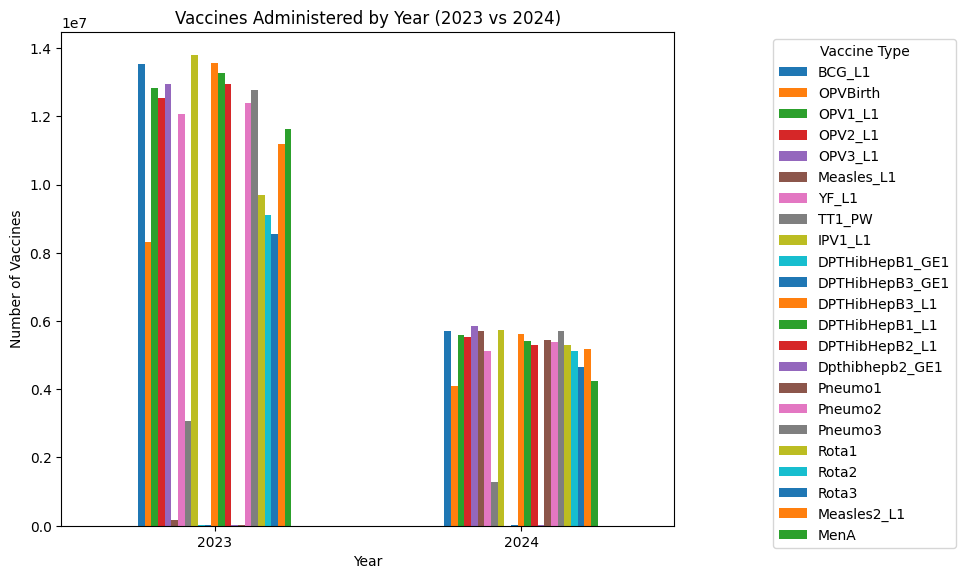

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Sum the vaccines by year
df_yearly_vaccines = ghana_all.groupby('Year')[vaccine_columns].sum()

# Plot the vaccines administered by year
df_yearly_vaccines.plot(kind='bar', figsize=(10, 6))
plt.title('Vaccines Administered by Year (2023 vs 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Vaccines')
plt.xticks(rotation=0)
plt.legend(title='Vaccine Type', bbox_to_anchor=(1.15, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

ghana_all_long = ghana_all.melt(id_vars=['district_name'], value_vars=vaccine_columns,
                                var_name='Vaccine_Type', value_name='Vaccines_Administered')

# Plot vaccines by district and vaccine type
fig = px.bar(ghana_all_long,
             x='Vaccine_Type',
             y='Vaccines_Administered',
             color='district_name',  # Color bars by district
             title='Vaccines Administered per District by Vaccine Type in 2023 and 2024',
             labels={'Vaccines_Administered': 'Total Vaccines', 'Vaccine_Type': 'Vaccine Type'},
             category_orders={'Vaccine_Type': vaccine_columns})

# Update layout for categorical x-axis
fig.update_layout(
    xaxis_title='Vaccine Type',
    yaxis_title='Total Vaccines Administered',
    xaxis=dict(
        tickangle=45,  # Rotate x-axis labels to avoid overlap
        type='category'  # Ensure the x-axis treats vaccine types as categories
    ),
    autosize=False,
    width=1200,
    height=600
)

fig.show()


Vaccines by District

In the above figure you can  check the number of vaccines administered in both 2023 and 2024 for each district on the legend colored differently for each district

In [ ]:
ghana_all[[ 'Survivors',	'Deaths',	'Outcome_Unknown']].describe()


,Survivors,Deaths,Outcome_Unknown
count,460.000000,460.000000,460.000000
mean,103.219565,0.923913,3.400000
std,130.775405,4.954771,11.425271
min,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000
75%,126.250000,0.000000,0.000000
max,1272.000000,84.000000,168.000000


### **4. Geospatial Mapping ( Yellow Fever disease outbreak locations and intensity temp)**

In [ ]:
ghana_all = ghana_all.drop('Outcome', axis=1)


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(ghana_all['Latitude'], ghana_all['Longitude'])]
gdf = gpd.GeoDataFrame(ghana_all, geometry=geometry)
gdf.set_crs("EPSG:4326", inplace=True)

print(gdf.head())


          district_name  Year   BCG_L1  OPVBirth  OPV1_L1  OPV2_L1  OPV3_L1  \
0      ablekuma central  2023   7824.0    5964.0  11610.0  12426.0  17616.0   
1        ablekuma north  2023   4666.0    4026.0   4596.0   5920.0   9302.0   
2         ablekuma west  2023  12490.0    9200.0  28860.0  32795.0  39265.0   
3         abuakwa north  2023  25179.0   23936.0  26763.0  27060.0  28116.0   
4  aburaasebukwamankese  2023  76140.0   60120.0  85464.0  87246.0  92538.0   

   Measles_L1    YF_L1   TT1_PW  ...     MenA  Survivors  Deaths  \
0       117.0  17319.0    564.0  ...  17814.0         36       0   
1        30.0   8232.0    508.0  ...   8234.0         12       0   
2       250.0  35235.0   2655.0  ...  33070.0         60       0   
3       220.0  24090.0   7656.0  ...  24618.0        132       0   
4      3006.0  87822.0  15840.0  ...  86580.0        216       0   

   Outcome_Unknown  Latitude  Longitude  best_temperature_2m  \
0                0  5.551591  -0.242777             

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np

ghana = ghana_all.dropna(subset=['Latitude', 'Longitude', 'district_name', 'best_temperature_2m'])

# Calculate the center of the map
center_lat, center_lon = ghana['Latitude'].mean(), ghana['Longitude'].mean()

# Create a folium map centered on the mean latitude and longitude
ghana_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Create a marker cluster for better marker management
marker_cluster = MarkerCluster().add_to(ghana_map)

# Define a function to categorize temperature intensity for the popup text
def categorize_temperature(temp):
    if temp < 20:
        return "Low Temperature (Risk for Yellow Fever disease)"
    elif 20 <= temp < 30:
        return "Moderate Temperature (Normal conditions)"
    else:
        return "High Temperature (Increased risk for disease outbreaks)"

# Iterate through each district and add markers with vaccine and temperature data
for _, row in ghana.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    district = row['district_name']
    temperature = row['best_temperature_2m']

    # Vaccine data (adjust columns accordingly)
    vaccine_data = row.iloc[2:27]  # Adjust to the correct vaccine data column range

    # Categorize temperature for outbreak risk
    temp_category = categorize_temperature(temperature)

    # Create the popup text with district, vaccine counts, and temperature data
    popup_text = f"<b>District:</b> {district}<br><b>Temperature:</b> {temperature}°C<br>{temp_category}<br>"

    for vaccine, count in vaccine_data.items():
        if count != 0:
            popup_text += f"{vaccine}: {count}<br>"

    # Choose the marker icon color based on temperature
    if temperature < 20:
        icon_color = 'green'  # Low risk
    elif 20 <= temperature < 30:
        icon_color = 'blue'   # Moderate risk
    else:
        icon_color = 'red'    # High risk

    # Add the marker to the marker cluster
    folium.Marker(
        location=[lat, lon],
        popup=popup_text,
        icon=folium.Icon(color=icon_color, icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
ghana_map


### **5. Correlation Analysis**

Vaccine Administered vs Outcome (Deaths and Survivors)

In [ ]:
outcome_columns = ['Survivors', 'Deaths', 'Outcome_Unknown']

subset_data = ghana_all[vaccine_columns + outcome_columns]

# Calculate the correlation matrix between vaccine types and outcomes
corr_matrix = subset_data.corr()

# Creating an annotated heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation"),
    text=corr_matrix.round(2).values,
    texttemplate="%{text}",
    hoverongaps=False,
))

fig.update_layout(
    title='Correlation Between Vaccine Types and Outcomes',
    xaxis_title='Vaccine Types / Outcomes',
    yaxis_title='Vaccine Types / Outcomes',
    xaxis=dict(tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    width=1200,
    height=800,
)

fig.show()



The figure above shows how vaccines administered helped in saving people at a 70% and above rate, especially YF_L1, 'DPTHibHepB1_GE1', 'DPTHibHepB3_GE1', 'DPTHibHepB3_L1', 'DPTHibHepB1_L1', 'DPTHibHepB2_L1', 'Dpthibhepb2_GE1', 'Pneumo1', 'Pneumo2', 'Pneumo3' were more effective and with a lower rate on deaths.

In [ ]:
ghana_all.drop('Outcome', axis=1)

,district_name,Year,BCG_L1,OPVBirth,OPV1_L1,OPV2_L1,OPV3_L1,Measles_L1,YF_L1,TT1_PW,...,Measles2_L1,MenA,Survivors,Deaths,Outcome_Unknown,Latitude,Longitude,best_temperature_2m,best_humidity_2m,Total_Vaccines
0,ablekuma central,2023,7824.0,5964.0,11610.0,12426.0,17616.0,117.0,17319.0,564.0,...,18825.0,17814.0,36,0,0,5.551591,-0.242777,30,NaN,225834.0
1,ablekuma north,2023,4666.0,4026.0,4596.0,5920.0,9302.0,30.0,8232.0,508.0,...,9270.0,8234.0,12,0,12,5.628217,-0.309717,35,NaN,114406.0
2,ablekuma west,2023,12490.0,9200.0,28860.0,32795.0,39265.0,250.0,35235.0,2655.0,...,30775.0,33070.0,60,0,0,5.627840,-0.311160,35,NaN,538930.0
3,abuakwa north,2023,25179.0,23936.0,26763.0,27060.0,28116.0,220.0,24090.0,7656.0,...,24607.0,24618.0,132,0,0,6.226380,-0.367462,38,NaN,457479.0
4,aburaasebukwamankese,2023,76140.0,60120.0,85464.0,87246.0,92538.0,3006.0,87822.0,15840.0,...,84060.0,86580.0,216,0,0,5.280733,-1.203583,36,NaN,1420578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,west mamprusi,2024,11100.0,4326.0,9474.0,8694.0,8328.0,7950.0,7419.0,2028.0,...,6930.0,4572.0,15,0,0,10.290376,-1.058318,42,98.21458,149766.0
456,yendi,2024,53522.0,27188.0,43876.0,46494.0,46676.0,43106.0,36638.0,840.0,...,36582.0,28602.0,70,0,0,9.441791,-0.011028,39,98.50655,741524.0
457,yilokrobo,2024,22080.0,14310.0,26220.0,25560.0,30795.0,29325.0,23820.0,4410.0,...,29850.0,25380.0,75,0,0,6.170803,-0.152201,38,100.00000,494610.0
458,yunyoonasuan,2024,4404.0,1540.0,3920.0,4072.0,4168.0,3932.0,3364.0,556.0,...,3276.0,1988.0,20,0,0,10.449898,-0.126759,42,99.09735,66460.0


In [ ]:

ghana_all['best_humidity_2m'] = pd.to_numeric(ghana_all['best_humidity_2m'], errors='coerce')

# Convert 'best_temperature_2m' to int, handling errors
ghana_all['best_temperature_2m'] = pd.to_numeric(ghana_all['best_temperature_2m'], errors='coerce').fillna(0).astype(int)



In [ ]:
import plotly.figure_factory as ff
import plotly.express as px
import pandas as pd

# Define the columns
outcome_columns = ['Survivors', 'Deaths']
temp_columns = ['best_temperature_2m', 'best_humidity_2m']

# Assuming 'Outcome' is a categorical variable based on 'Survivors'
ghana_all['Outcome'] = ghana_all['Survivors'].map(lambda x: 'Survivors' if x == 1 else 'Deaths')

# Subset data for correlation
subset_data = ghana_all[outcome_columns + temp_columns]

# Calculate the correlation matrix
corr_matrix = subset_data.corr()

# Set the colorscale for the heatmap
colorscale = [
    [0.0, 'rgb(255,255,255)'],
    [0.2, 'rgb(255, 255, 153)'],
    [0.4, 'rgb(153, 255, 204)'],
    [0.6, 'rgb(179, 217, 255)'],
    [0.8, 'rgb(240, 179, 255)'],
    [1.0, 'rgb(255, 77, 148)']
]

# Create an annotated heatmap
# Convert columns and index to lists
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,               # Correlation values as the heatmap data
    x=list(corr_matrix.columns),         # Convert columns to a list
    y=list(corr_matrix.columns),         # Convert index to a list
    colorscale=colorscale,               # Custom color scale
    font_colors=['black'],               # Font color for annotations
    annotation_text=corr_matrix.round(2).values.astype(str),  # Rounded correlation values as text
    hoverinfo='text',                    # Show correlation values on hover
)

fig.update_layout(
    title_text='Correlation Between Outcomes and Temperature/Humidity',
    margin=dict(l=10, r=10, t=40, b=10),
    xaxis=dict(zeroline=False, showgrid=False),
    yaxis=dict(zeroline=False, showgrid=False, scaleanchor="x"),
)

fig.show()



No correlation between Outcomes and Temperature/Humidity

### **6. Predictive Modeling**